initial centroids are: [[1.93794984e+01 2.39760000e-03 4.89165600e-03 2.94206000e-02
  4.62957989e+00 6.83562880e-02 3.05161732e+01 2.13904278e-02
  4.39415266e+01]
 [2.60868530e+01 3.59640000e-01 6.82926000e+00 4.10520000e-02
  3.75667740e+00 3.87200000e-02 4.55400000e+00 8.00016000e+00
  4.52029166e+01]
 [1.98661419e+01 0.00000000e+00 9.67213800e+00 5.29570800e+00
  4.26223440e+00 1.85856000e-01 1.51680000e+01 4.85724000e-01
  4.53232901e+01]
 [1.87788008e+01 4.37562000e-01 1.19273820e+01 3.42100000e-02
  1.24522578e+01 2.16832000e-01 6.78600000e+00 6.70013400e+00
  4.32476426e+01]]
group result iteration 1 [504. 138. 202. 128.]
group result iteration 2 [504. 141. 200. 127.]
group result iteration 3 [504. 141. 200. 127.]
Wkmeans Finish!


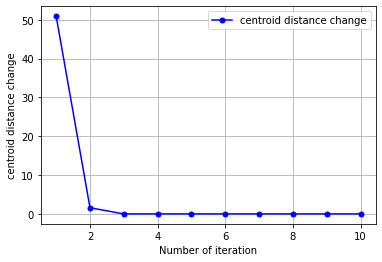

****************************** model performance ******************************
Homogeneity Score         (均一性):  0.730800911595108
Completeness Score        (完整性):  0.707588179192041
V-Measure Score           (V量):  0.719007241781128
Adjusted Rand Score       (调整后兰德指数):  0.6836460449215455
Adjusted Mutual Info Score(调整后的共同信息):  0.717900397310143
Calinski Harabasz Score:  (方差比指数)  754.1580114323565
Silhouette Score          (轮廓分数):  0.6143388822782253
None


In [18]:
from wkmeans_class import *
import pandas as pd
import numpy as np

wkmeans=wkmeans()
orig_data = pd.read_excel('test4.xlsx')
orig_data.dropna(inplace=True)

x_orig_data = orig_data.drop('TRUE VALUE',axis=1)
y_label = orig_data['TRUE VALUE']

x_data = np.array(x_orig_data)
        
feature= pd.read_excel('feature.xlsx') # read initial features from feature.xlsx file
feature = np.array(feature)
n_iters = feature[0,0]
n_clusters = feature[0,1]
centroids = wkmeans.plus_plus(x_data, n_clusters)
dist = np.zeros((x_data.shape[0],n_clusters), dtype=float)

print("initial centroids are:",centroids)

w = wkmeans.CalcWeight(x_data)
tol=1e-7
count=0
C = np.zeros(n_iters)

for i in range(n_iters):
    count+=1
    group= np.zeros(n_clusters)
    old_centroids=centroids.copy()
    for j in range(x_data.shape[0]):
        distance = np.power(x_data[j,:]-centroids, 2)  
        distance = np.sum(w*distance, axis=1)
        distance = np.sqrt(distance) 
        dist[j,:] = distance
    idx = np.argmin(dist, axis=1)   # predicted group index

    for k in range(n_clusters):
        d = x_data[idx==k, :]
        group[k]=d.shape[0]
        centroids[k,:] = np.mean(d, axis=0)
    print('group result iteration', count, group)   # group number after each iterration
    centroid_change=wkmeans.sqrsum(centroids - old_centroids)
    C[i]=centroid_change
    if centroid_change <= tol:
            break
print("Wkmeans Finish!")

plt.plot(np.arange(n_iters)+1, C, color='blue', marker='o', markersize=5, label='centroid distance change')
plt.grid(True)
plt.xlabel("Number of iteration")
plt.ylabel("centroid distance change")
plt.legend(loc='best')
plt.show()

print(wkmeans.get_marks(x_data, y_label, idx))

